### Fouls Model_1_(Aug 2023)


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  

%matplotlib inline

In [48]:
df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Python Analysis\\Leagues_Fouls_DF_Prepared.csv', index_col=[0])

In [49]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HF,AF,HF_Lg_Av,AF_Lg_Av,TG,TF,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,I1,21/08/2021,Inter,Genoa,4,0,18.0,7.0,13.06,13.5,4,25.0,0.71,0.19,0.11,0.58,0.42,3.03,2.44,0.62,1.82
1,I1,21/08/2021,Verona,Sassuolo,2,3,11.0,12.0,13.06,13.5,5,23.0,0.37,0.28,0.36,0.52,0.48,2.76,1.41,1.38,0.03
2,I1,21/08/2021,Empoli,Lazio,1,3,13.0,10.0,13.06,13.5,4,23.0,0.20,0.24,0.55,0.56,0.44,2.94,0.94,1.97,-1.03
3,I1,21/08/2021,Torino,Atalanta,1,2,17.0,13.0,13.06,13.5,3,30.0,0.18,0.23,0.60,0.61,0.39,3.14,0.93,2.25,-1.32
4,I1,22/08/2021,Bologna,Salernitana,3,2,13.0,15.0,13.06,13.5,5,28.0,0.58,0.24,0.19,0.53,0.47,2.79,1.95,0.86,1.09


In [50]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HF', 'AF',
       'HF_Lg_Av', 'AF_Lg_Av', 'TG', 'TF', 'HW_%', 'X_%', 'AW_%', 'Ov2.5_%',
       'Un2.5_%', 'Exp', 'HG_Exp', 'AG_Exp', 'Sup Exp'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19360 entries, 0 to 19359
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       19360 non-null  object 
 1   Date      19360 non-null  object 
 2   HomeTeam  19360 non-null  object 
 3   AwayTeam  19360 non-null  object 
 4   FTHG      19360 non-null  int64  
 5   FTAG      19360 non-null  int64  
 6   HF        19116 non-null  float64
 7   AF        19116 non-null  float64
 8   HF_Lg_Av  19120 non-null  float64
 9   AF_Lg_Av  19120 non-null  float64
 10  TG        19360 non-null  int64  
 11  TF        19116 non-null  float64
 12  HW_%      19359 non-null  float64
 13  X_%       19359 non-null  float64
 14  AW_%      19359 non-null  float64
 15  Ov2.5_%   19358 non-null  float64
 16  Un2.5_%   19358 non-null  float64
 17  Exp       19358 non-null  float64
 18  HG_Exp    19358 non-null  float64
 19  AG_Exp    19358 non-null  float64
 20  Sup Exp   19358 non-null  fl

In [52]:
df.describe()

,FTHG,FTAG,HF,AF,HF_Lg_Av,AF_Lg_Av,TG,TF,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
count,19360.000000,19360.000000,19116.000000,19116.000000,19120.000000,19120.000000,19360.000000,19116.000000,19359.00000,19359.000000,19359.000000,19358.000000,19358.000000,19358.000000,19358.000000,19358.000000,19358.000000
mean,1.533523,1.225413,12.627485,12.892237,12.626943,12.891611,2.758936,25.519722,0.43915,0.249001,0.311845,0.520381,0.479619,2.778384,1.579032,1.199290,0.379742
std,1.313667,1.181899,4.169821,4.241506,1.578032,1.496988,1.672344,6.567286,0.18677,0.051216,0.170324,0.090375,0.090375,0.393290,0.636692,0.542129,1.115232
min,0.000000,0.000000,0.000000,0.000000,9.690000,10.160000,0.000000,0.000000,0.03000,0.050000,0.020000,0.280000,0.140000,1.840000,0.250000,0.180000,-3.850000
25%,1.000000,0.000000,10.000000,10.000000,11.240000,11.730000,2.000000,21.000000,0.31000,0.220000,0.190000,0.450000,0.420000,2.470000,1.160000,0.840000,-0.240000
50%,1.000000,1.000000,12.000000,13.000000,12.840000,12.860000,3.000000,25.000000,0.43000,0.260000,0.290000,0.510000,0.490000,2.710000,1.450000,1.090000,0.350000
75%,2.000000,2.000000,15.000000,16.000000,13.680000,13.820000,4.000000,30.000000,0.56000,0.290000,0.400000,0.580000,0.550000,3.030000,1.890000,1.450000,1.020000
max,10.000000,13.000000,33.000000,34.000000,16.480000,16.050000,13.000000,54.000000,0.92000,0.460000,0.890000,0.860000,0.720000,4.850000,4.610000,4.300000,4.360000


In [53]:
df['Div'].unique()

array(['I1', 'E0', 'D1', 'SP1', 'F1', 'SC0', 'N1', 'P1', 'B1'],
      dtype=object)

In [54]:
df=df[['Date', 'HomeTeam', 'AwayTeam', 'HF', 'AF', 'HF_Lg_Av', 'AF_Lg_Av', 'Sup Exp','HG_Exp', 'AG_Exp']]


In [55]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Convert 'Date' column to datetime



# ______________________________________________________________________________

#### Split the data in separate yearly dataframes so running team averages can be incorporated


In [56]:
# Create df 2020 for season 2020-2021

# Define the start and end dates of your range
start_date = pd.to_datetime('20/08/2020', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2021', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2020 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2020 = df_2020.reset_index(drop=True)


In [57]:
df_2020

,Date,HomeTeam,AwayTeam,HF,AF,HF_Lg_Av,AF_Lg_Av,Sup Exp,HG_Exp,AG_Exp
0,2020-09-19,Fiorentina,Torino,17.0,20.0,13.68,13.82,0.79,1.79,1.00
1,2020-09-19,Verona,Roma,19.0,20.0,13.68,13.82,-0.67,1.06,1.73
2,2020-09-20,Parma,Napoli,16.0,12.0,13.68,13.82,-1.20,0.93,2.13
3,2020-09-20,Genoa,Crotone,13.0,14.0,13.68,13.82,0.69,1.69,1.00
4,2020-09-20,Sassuolo,Cagliari,9.0,18.0,13.68,13.82,0.72,1.91,1.19
...,...,...,...,...,...,...,...,...,...,...
2929,2021-04-18,Oostende,Cercle Brugge,14.0,11.0,12.48,12.86,1.20,2.07,0.87
2930,2021-04-18,Oud-Heverlee Leuven,Waasland-Beveren,12.0,11.0,12.48,12.86,0.85,2.13,1.28
2931,2021-04-18,St Truiden,Anderlecht,10.0,8.0,12.48,12.86,-1.11,0.81,1.92
2932,2021-04-18,Standard,Beerschot VA,14.0,15.0,12.48,12.86,1.21,2.12,0.91


In [58]:
# adds column and evaluates the running HF_f value
df_2020['H_Fl_F_Av'] = np.nan

for i, row in df_2020.iterrows():
    home_team = row['HomeTeam']
    previous_home_hf = df_2020.loc[:i-1, 'HF'][df_2020['HomeTeam'] == home_team]
    previous_away_af = df_2020.loc[:i-1, 'AF'][df_2020['AwayTeam'] == home_team]
    
    if len(previous_home_hf) > 0:
        x = previous_home_hf.sum()
    else:
        x = np.nan
    
    if len(previous_away_af) > 0:
        y = previous_away_af.sum()
    else:
        y = np.nan
    
    if len(previous_home_hf) > 0 or len(previous_away_af) > 0:
        xy = (x + y) / (len(previous_home_hf) + len(previous_away_af))
        df_2020.at[i, 'H_Fl_F_Av'] = xy.round(2)
    else:
        df_2020.at[i, 'H_Fl_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AF_f value
df_2020['A_Fl_F_Av'] = np.nan

for i, row in df_2020.iterrows():
    away_team = row['AwayTeam']
    previous_away_hf = df_2020.loc[:i-1, 'AF'][df_2020['AwayTeam'] == away_team]
    previous_home_af = df_2020.loc[:i-1, 'HF'][df_2020['HomeTeam'] == away_team]
    
    if len(previous_away_hf) > 0:
        x = previous_away_hf.sum()
    else:
        x = np.nan
    
    if len(previous_home_af) > 0:
        y = previous_home_af.sum()
    else:
        y = np.nan
    
    if len(previous_away_hf) > 0 or len(previous_home_af) > 0:
        xy = (x + y) / (len(previous_away_hf) + len(previous_home_af))
        df_2020.at[i, 'A_Fl_F_Av'] = xy.round(2)
    else:
        df_2020.at[i, 'A_Fl_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HF_a value
df_2020['H_Fl_Ag_Av'] = np.nan

for i, row in df_2020.iterrows():
    home_team = row['HomeTeam']
    previous_home_f_a = df_2020.loc[:i-1, 'AF'][df_2020['HomeTeam'] == home_team]
    previous_away_f_a = df_2020.loc[:i-1, 'HF'][df_2020['AwayTeam'] == home_team]
    
    if len(previous_home_f_a) > 0:
        x = previous_home_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_f_a) > 0:
        y = previous_away_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_f_a) > 0 or len(previous_away_f_a) > 0:
        xy = (x + y) / (len(previous_home_f_a) + len(previous_away_f_a))
        df_2020.at[i, 'H_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2020.at[i, 'H_Fl_Ag_Av'] = np.nan 
        
# adds column and evaluates the running AF_a value
df_2020['A_Fl_Ag_Av'] = np.nan

for i, row in df_2020.iterrows():
    away_team = row['AwayTeam']
    previous_away_f_a = df_2020.loc[:i-1, 'HF'][df_2020['AwayTeam'] == away_team]
    previous_home_f_a = df_2020.loc[:i-1, 'AF'][df_2020['HomeTeam'] == away_team]
    
    if len(previous_away_f_a) > 0:
        x = previous_away_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_f_a) > 0:
        y = previous_home_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_f_a) > 0 or len(previous_home_f_a) > 0:
        xy = (x + y) / (len(previous_away_f_a) + len(previous_home_f_a))
        df_2020.at[i, 'A_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2020.at[i, 'A_Fl_Ag_Av'] = np.nan        

In [59]:
df_2020.head()

,Date,HomeTeam,AwayTeam,HF,AF,HF_Lg_Av,AF_Lg_Av,Sup Exp,HG_Exp,AG_Exp,H_Fl_F_Av,A_Fl_F_Av,H_Fl_Ag_Av,A_Fl_Ag_Av
0,2020-09-19,Fiorentina,Torino,17.0,20.0,13.68,13.82,0.79,1.79,1.00,NaN,NaN,NaN,NaN
1,2020-09-19,Verona,Roma,19.0,20.0,13.68,13.82,-0.67,1.06,1.73,NaN,NaN,NaN,NaN
2,2020-09-20,Parma,Napoli,16.0,12.0,13.68,13.82,-1.20,0.93,2.13,NaN,NaN,NaN,NaN
3,2020-09-20,Genoa,Crotone,13.0,14.0,13.68,13.82,0.69,1.69,1.00,NaN,NaN,NaN,NaN
4,2020-09-20,Sassuolo,Cagliari,9.0,18.0,13.68,13.82,0.72,1.91,1.19,NaN,NaN,NaN,NaN


# _______________________________________________________________________________

In [60]:
# Create df 2019 for season 2019-2020

# Define the start and end dates of your range
start_date = pd.to_datetime('20/08/2019', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2020', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2019 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2019 = df_2019.reset_index(drop=True)


In [61]:
# **** 2019 ****

# adds column and evaluates the running HF_f value
df_2019['H_Fl_F_Av'] = np.nan

for i, row in df_2019.iterrows():
    home_team = row['HomeTeam']
    previous_home_hf = df_2019.loc[:i-1, 'HF'][df_2019['HomeTeam'] == home_team]
    previous_away_af = df_2019.loc[:i-1, 'AF'][df_2019['AwayTeam'] == home_team]
    
    if len(previous_home_hf) > 0:
        x = previous_home_hf.sum()
    else:
        x = np.nan
    
    if len(previous_away_af) > 0:
        y = previous_away_af.sum()
    else:
        y = np.nan
    
    if len(previous_home_hf) > 0 or len(previous_away_af) > 0:
        xy = (x + y) / (len(previous_home_hf) + len(previous_away_af))
        df_2019.at[i, 'H_Fl_F_Av'] = xy.round(2)
    else:
        df_2019.at[i, 'H_Fl_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AF_f value
df_2019['A_Fl_F_Av'] = np.nan

for i, row in df_2019.iterrows():
    away_team = row['AwayTeam']
    previous_away_hf = df_2019.loc[:i-1, 'AF'][df_2019['AwayTeam'] == away_team]
    previous_home_af = df_2019.loc[:i-1, 'HF'][df_2019['HomeTeam'] == away_team]
    
    if len(previous_away_hf) > 0:
        x = previous_away_hf.sum()
    else:
        x = np.nan
    
    if len(previous_home_af) > 0:
        y = previous_home_af.sum()
    else:
        y = np.nan
    
    if len(previous_away_hf) > 0 or len(previous_home_af) > 0:
        xy = (x + y) / (len(previous_away_hf) + len(previous_home_af))
        df_2019.at[i, 'A_Fl_F_Av'] = xy.round(2)
    else:
        df_2019.at[i, 'A_Fl_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HF_a value
df_2019['H_Fl_Ag_Av'] = np.nan

for i, row in df_2019.iterrows():
    home_team = row['HomeTeam']
    previous_home_f_a = df_2019.loc[:i-1, 'AF'][df_2019['HomeTeam'] == home_team]
    previous_away_f_a = df_2019.loc[:i-1, 'HF'][df_2019['AwayTeam'] == home_team]
    
    if len(previous_home_f_a) > 0:
        x = previous_home_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_f_a) > 0:
        y = previous_away_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_f_a) > 0 or len(previous_away_f_a) > 0:
        xy = (x + y) / (len(previous_home_f_a) + len(previous_away_f_a))
        df_2019.at[i, 'H_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2019.at[i, 'H_Fl_Ag_Av'] = np.nan 
        
# adds column and evaluates the running AF_a value
df_2019['A_Fl_Ag_Av'] = np.nan

for i, row in df_2019.iterrows():
    away_team = row['AwayTeam']
    previous_away_f_a = df_2019.loc[:i-1, 'HF'][df_2019['AwayTeam'] == away_team]
    previous_home_f_a = df_2019.loc[:i-1, 'AF'][df_2019['HomeTeam'] == away_team]
    
    if len(previous_away_f_a) > 0:
        x = previous_away_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_f_a) > 0:
        y = previous_home_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_f_a) > 0 or len(previous_home_f_a) > 0:
        xy = (x + y) / (len(previous_away_f_a) + len(previous_home_f_a))
        df_2019.at[i, 'A_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2019.at[i, 'A_Fl_Ag_Av'] = np.nan        
        

In [62]:
df_2019.tail()

,Date,HomeTeam,AwayTeam,HF,AF,HF_Lg_Av,AF_Lg_Av,Sup Exp,HG_Exp,AG_Exp,H_Fl_F_Av,A_Fl_F_Av,H_Fl_Ag_Av,A_Fl_Ag_Av
2059,2020-03-07,Kortrijk,Antwerp,17.0,12.0,13.29,14.46,-0.24,1.26,1.50,16.00,14.21,13.29,14.83
2060,2020-03-07,Mechelen,Eupen,12.0,9.0,13.29,14.46,1.32,2.04,0.72,12.21,15.04,14.71,13.21
2061,2020-03-07,Mouscron,Waasland-Beveren,12.0,12.0,13.29,14.46,0.41,1.56,1.15,14.71,14.29,12.17,13.83
2062,2020-03-07,Oostende,Genk,11.0,15.0,13.29,14.46,-0.52,1.21,1.73,12.75,11.79,13.33,14.46
2063,2020-03-07,Standard,St Truiden,14.0,21.0,13.29,14.46,1.86,2.50,0.64,12.88,11.96,14.58,13.58


# ____________________________________________________________________________

In [63]:
# Create df 2018 for season 2018-2019

# Define the start and end dates of your range
start_date = pd.to_datetime('10/08/2018', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2019', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2018 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2018 = df_2018.reset_index(drop=True)


In [64]:
# adds column and evaluates the running HF_f value
df_2018['H_Fl_F_Av'] = np.nan

for i, row in df_2018.iterrows():
    home_team = row['HomeTeam']
    previous_home_hf = df_2018.loc[:i-1, 'HF'][df_2018['HomeTeam'] == home_team]
    previous_away_af = df_2018.loc[:i-1, 'AF'][df_2018['AwayTeam'] == home_team]
    
    if len(previous_home_hf) > 0:
        x = previous_home_hf.sum()
    else:
        x = np.nan
    
    if len(previous_away_af) > 0:
        y = previous_away_af.sum()
    else:
        y = np.nan
    
    if len(previous_home_hf) > 0 or len(previous_away_af) > 0:
        xy = (x + y) / (len(previous_home_hf) + len(previous_away_af))
        df_2018.at[i, 'H_Fl_F_Av'] = xy.round(2)
    else:
        df_2018.at[i, 'H_Fl_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AF_f value
df_2018['A_Fl_F_Av'] = np.nan

for i, row in df_2018.iterrows():
    away_team = row['AwayTeam']
    previous_away_hf = df_2018.loc[:i-1, 'AF'][df_2018['AwayTeam'] == away_team]
    previous_home_af = df_2018.loc[:i-1, 'HF'][df_2018['HomeTeam'] == away_team]
    
    if len(previous_away_hf) > 0:
        x = previous_away_hf.sum()
    else:
        x = np.nan
    
    if len(previous_home_af) > 0:
        y = previous_home_af.sum()
    else:
        y = np.nan
    
    if len(previous_away_hf) > 0 or len(previous_home_af) > 0:
        xy = (x + y) / (len(previous_away_hf) + len(previous_home_af))
        df_2018.at[i, 'A_Fl_F_Av'] = xy.round(2)
    else:
        df_2018.at[i, 'A_Fl_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HF_a value
df_2018['H_Fl_Ag_Av'] = np.nan

for i, row in df_2018.iterrows():
    home_team = row['HomeTeam']
    previous_home_f_a = df_2018.loc[:i-1, 'AF'][df_2018['HomeTeam'] == home_team]
    previous_away_f_a = df_2018.loc[:i-1, 'HF'][df_2018['AwayTeam'] == home_team]
    
    if len(previous_home_f_a) > 0:
        x = previous_home_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_f_a) > 0:
        y = previous_away_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_f_a) > 0 or len(previous_away_f_a) > 0:
        xy = (x + y) / (len(previous_home_f_a) + len(previous_away_f_a))
        df_2018.at[i, 'H_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2018.at[i, 'H_Fl_Ag_Av'] = np.nan 
        
# adds column and evaluates the running AF_a value
df_2018['A_Fl_Ag_Av'] = np.nan

for i, row in df_2018.iterrows():
    away_team = row['AwayTeam']
    previous_away_f_a = df_2018.loc[:i-1, 'HF'][df_2018['AwayTeam'] == away_team]
    previous_home_f_a = df_2018.loc[:i-1, 'AF'][df_2018['HomeTeam'] == away_team]
    
    if len(previous_away_f_a) > 0:
        x = previous_away_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_f_a) > 0:
        y = previous_home_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_f_a) > 0 or len(previous_home_f_a) > 0:
        xy = (x + y) / (len(previous_away_f_a) + len(previous_home_f_a))
        df_2018.at[i, 'A_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2018.at[i, 'A_Fl_Ag_Av'] = np.nan        

In [65]:
df_2018

,Date,HomeTeam,AwayTeam,HF,AF,HF_Lg_Av,AF_Lg_Av,Sup Exp,HG_Exp,AG_Exp,H_Fl_F_Av,A_Fl_F_Av,H_Fl_Ag_Av,A_Fl_Ag_Av
0,2018-08-18,Chievo,Juventus,7.0,9.0,12.84,13.25,-2.06,0.44,2.50,NaN,NaN,NaN,NaN
1,2018-08-18,Lazio,Napoli,8.0,5.0,12.84,13.25,-0.14,1.40,1.54,NaN,NaN,NaN,NaN
2,2018-08-19,Bologna,Spal,16.0,11.0,12.84,13.25,0.33,1.31,0.98,NaN,NaN,NaN,NaN
3,2018-08-19,Empoli,Cagliari,19.0,19.0,12.84,13.25,0.37,1.42,1.05,NaN,NaN,NaN,NaN
4,2018-08-19,Parma,Udinese,10.0,13.0,12.84,13.25,0.14,1.27,1.13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,2019-03-17,Lokeren,Cercle Brugge,NaN,NaN,NaN,NaN,0.37,1.58,1.21,0.0,0.0,0.0,0.0
2658,2019-03-17,Oostende,Anderlecht,NaN,NaN,NaN,NaN,-1.11,0.94,2.05,0.0,0.0,0.0,0.0
2659,2019-03-17,St Truiden,Gent,NaN,NaN,NaN,NaN,-0.66,1.32,1.98,0.0,0.0,0.0,0.0
2660,2019-03-17,Standard,Waasland-Beveren,NaN,NaN,NaN,NaN,2.12,2.64,0.52,0.0,0.0,0.0,0.0


# ___________________________________________________________________________________-

In [66]:
# Create df 2017 for season 2017-2018

# Define the start and end dates of your range
start_date = pd.to_datetime('10/08/2017', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2018', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2017 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2017 = df_2017.reset_index(drop=True)


In [67]:
# adds column and evaluates the running HF_f value
df_2017['H_Fl_F_Av'] = np.nan

for i, row in df_2017.iterrows():
    home_team = row['HomeTeam']
    previous_home_hf = df_2017.loc[:i-1, 'HF'][df_2017['HomeTeam'] == home_team]
    previous_away_af = df_2017.loc[:i-1, 'AF'][df_2017['AwayTeam'] == home_team]
    
    if len(previous_home_hf) > 0:
        x = previous_home_hf.sum()
    else:
        x = np.nan
    
    if len(previous_away_af) > 0:
        y = previous_away_af.sum()
    else:
        y = np.nan
    
    if len(previous_home_hf) > 0 or len(previous_away_af) > 0:
        xy = (x + y) / (len(previous_home_hf) + len(previous_away_af))
        df_2017.at[i, 'H_Fl_F_Av'] = xy.round(2)
    else:
        df_2017.at[i, 'H_Fl_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AF_f value
df_2017['A_Fl_F_Av'] = np.nan

for i, row in df_2017.iterrows():
    away_team = row['AwayTeam']
    previous_away_hf = df_2017.loc[:i-1, 'AF'][df_2017['AwayTeam'] == away_team]
    previous_home_af = df_2017.loc[:i-1, 'HF'][df_2017['HomeTeam'] == away_team]
    
    if len(previous_away_hf) > 0:
        x = previous_away_hf.sum()
    else:
        x = np.nan
    
    if len(previous_home_af) > 0:
        y = previous_home_af.sum()
    else:
        y = np.nan
    
    if len(previous_away_hf) > 0 or len(previous_home_af) > 0:
        xy = (x + y) / (len(previous_away_hf) + len(previous_home_af))
        df_2017.at[i, 'A_Fl_F_Av'] = xy.round(2)
    else:
        df_2017.at[i, 'A_Fl_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HF_a value
df_2017['H_Fl_Ag_Av'] = np.nan

for i, row in df_2017.iterrows():
    home_team = row['HomeTeam']
    previous_home_f_a = df_2017.loc[:i-1, 'AF'][df_2017['HomeTeam'] == home_team]
    previous_away_f_a = df_2017.loc[:i-1, 'HF'][df_2017['AwayTeam'] == home_team]
    
    if len(previous_home_f_a) > 0:
        x = previous_home_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_f_a) > 0:
        y = previous_away_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_f_a) > 0 or len(previous_away_f_a) > 0:
        xy = (x + y) / (len(previous_home_f_a) + len(previous_away_f_a))
        df_2017.at[i, 'H_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2017.at[i, 'H_Fl_Ag_Av'] = np.nan 
        
# adds column and evaluates the running AF_a value
df_2017['A_Fl_Ag_Av'] = np.nan

for i, row in df_2017.iterrows():
    away_team = row['AwayTeam']
    previous_away_f_a = df_2017.loc[:i-1, 'HF'][df_2017['AwayTeam'] == away_team]
    previous_home_f_a = df_2017.loc[:i-1, 'AF'][df_2017['HomeTeam'] == away_team]
    
    if len(previous_away_f_a) > 0:
        x = previous_away_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_f_a) > 0:
        y = previous_home_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_f_a) > 0 or len(previous_home_f_a) > 0:
        xy = (x + y) / (len(previous_away_f_a) + len(previous_home_f_a))
        df_2017.at[i, 'A_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2017.at[i, 'A_Fl_Ag_Av'] = np.nan        

In [68]:
df_2017

,Date,HomeTeam,AwayTeam,HF,AF,HF_Lg_Av,AF_Lg_Av,Sup Exp,HG_Exp,AG_Exp,H_Fl_F_Av,A_Fl_F_Av,H_Fl_Ag_Av,A_Fl_Ag_Av
0,2017-08-19,Juventus,Cagliari,13.0,11.0,12.74,12.81,2.44,2.79,0.35,NaN,NaN,NaN,NaN
1,2017-08-19,Verona,Napoli,7.0,9.0,12.74,12.81,-1.66,0.70,2.36,NaN,NaN,NaN,NaN
2,2017-08-20,Atalanta,Roma,14.0,16.0,12.74,12.81,-0.34,1.25,1.59,NaN,NaN,NaN,NaN
3,2017-08-20,Bologna,Torino,18.0,10.0,12.74,12.81,-0.27,1.13,1.40,NaN,NaN,NaN,NaN
4,2017-08-20,Crotone,Milan,9.0,14.0,12.74,12.81,-1.22,0.82,2.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,2018-05-12,Motherwell,Hamilton,16.0,6.0,11.80,12.39,0.71,1.62,0.91,14.61,13.25,11.22,11.06
2034,2018-05-12,St Johnstone,Ross County,14.0,12.0,11.80,12.39,-0.02,1.21,1.23,10.67,11.75,12.03,12.28
2035,2018-05-13,Celtic,Aberdeen,15.0,10.0,11.80,12.39,1.50,2.18,0.68,9.06,12.11,12.83,12.61
2036,2018-05-13,Hibernian,Rangers,16.0,14.0,11.80,12.39,-0.08,1.34,1.42,10.86,12.78,14.08,12.22


# _____________________________________________________________________

In [69]:
# Create df 2016 for season 2016-2017

# Define the start and end dates of range
start_date = pd.to_datetime('10/08/2016', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2017', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2016 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2016 = df_2016.reset_index(drop=True)

In [70]:
# adds column and evaluates the running HF_f value
df_2016['H_Fl_F_Av'] = np.nan

for i, row in df_2016.iterrows():
    home_team = row['HomeTeam']
    previous_home_hf = df_2016.loc[:i-1, 'HF'][df_2016['HomeTeam'] == home_team]
    previous_away_af = df_2016.loc[:i-1, 'AF'][df_2016['AwayTeam'] == home_team]
    
    if len(previous_home_hf) > 0:
        x = previous_home_hf.sum()
    else:
        x = np.nan
    
    if len(previous_away_af) > 0:
        y = previous_away_af.sum()
    else:
        y = np.nan
    
    if len(previous_home_hf) > 0 or len(previous_away_af) > 0:
        xy = (x + y) / (len(previous_home_hf) + len(previous_away_af))
        df_2016.at[i, 'H_Fl_F_Av'] = xy.round(2)
    else:
        df_2016.at[i, 'H_Fl_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AF_f value
df_2016['A_Fl_F_Av'] = np.nan

for i, row in df_2016.iterrows():
    away_team = row['AwayTeam']
    previous_away_hf = df_2016.loc[:i-1, 'AF'][df_2016['AwayTeam'] == away_team]
    previous_home_af = df_2016.loc[:i-1, 'HF'][df_2016['HomeTeam'] == away_team]
    
    if len(previous_away_hf) > 0:
        x = previous_away_hf.sum()
    else:
        x = np.nan
    
    if len(previous_home_af) > 0:
        y = previous_home_af.sum()
    else:
        y = np.nan
    
    if len(previous_away_hf) > 0 or len(previous_home_af) > 0:
        xy = (x + y) / (len(previous_away_hf) + len(previous_home_af))
        df_2016.at[i, 'A_Fl_F_Av'] = xy.round(2)
    else:
        df_2016.at[i, 'A_Fl_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HF_a value
df_2016['H_Fl_Ag_Av'] = np.nan

for i, row in df_2016.iterrows():
    home_team = row['HomeTeam']
    previous_home_f_a = df_2016.loc[:i-1, 'AF'][df_2016['HomeTeam'] == home_team]
    previous_away_f_a = df_2016.loc[:i-1, 'HF'][df_2016['AwayTeam'] == home_team]
    
    if len(previous_home_f_a) > 0:
        x = previous_home_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_f_a) > 0:
        y = previous_away_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_f_a) > 0 or len(previous_away_f_a) > 0:
        xy = (x + y) / (len(previous_home_f_a) + len(previous_away_f_a))
        df_2016.at[i, 'H_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2016.at[i, 'H_Fl_Ag_Av'] = np.nan 
        
# adds column and evaluates the running AF_a value
df_2016['A_Fl_Ag_Av'] = np.nan

for i, row in df_2016.iterrows():
    away_team = row['AwayTeam']
    previous_away_f_a = df_2016.loc[:i-1, 'HF'][df_2016['AwayTeam'] == away_team]
    previous_home_f_a = df_2016.loc[:i-1, 'AF'][df_2016['HomeTeam'] == away_team]
    
    if len(previous_away_f_a) > 0:
        x = previous_away_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_f_a) > 0:
        y = previous_home_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_f_a) > 0 or len(previous_home_f_a) > 0:
        xy = (x + y) / (len(previous_away_f_a) + len(previous_home_f_a))
        df_2016.at[i, 'A_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2016.at[i, 'A_Fl_Ag_Av'] = np.nan        

In [71]:
df_2016

,Date,HomeTeam,AwayTeam,HF,AF,HF_Lg_Av,AF_Lg_Av,Sup Exp,HG_Exp,AG_Exp,H_Fl_F_Av,A_Fl_F_Av,H_Fl_Ag_Av,A_Fl_Ag_Av
0,2016-08-20,Juventus,Fiorentina,11.0,16.0,13.98,13.95,1.30,1.93,0.63,NaN,NaN,NaN,NaN
1,2016-08-20,Roma,Udinese,8.0,14.0,13.98,13.95,1.48,2.16,0.68,NaN,NaN,NaN,NaN
2,2016-08-21,Atalanta,Lazio,5.0,16.0,13.98,13.95,-0.19,1.09,1.28,NaN,NaN,NaN,NaN
3,2016-08-21,Bologna,Crotone,7.0,17.0,13.98,13.95,0.69,1.47,0.78,NaN,NaN,NaN,NaN
4,2016-08-21,Chievo,Inter,15.0,13.0,13.98,13.95,-0.49,0.92,1.41,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2017-05-20,Inverness C,Motherwell,9.0,14.0,11.92,12.31,1.12,2.09,0.97,13.36,11.72,13.31,11.42
2044,2017-05-20,Kilmarnock,Ross County,7.0,14.0,11.92,12.31,-0.05,1.33,1.38,11.81,11.86,12.17,12.28
2045,2017-05-21,Celtic,Hearts,10.0,15.0,11.92,12.31,2.49,3.03,0.54,10.72,12.64,11.31,12.53
2046,2017-05-21,Partick,Aberdeen,9.0,14.0,11.92,12.31,-0.81,0.89,1.70,12.17,12.03,10.47,12.78


# _________________________________________________________________________________

In [72]:
# Create df 2015 for season 2015-2016

# Define the start and end dates of range
start_date = pd.to_datetime('10/08/2015', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2016', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2015 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2015 = df_2015.reset_index(drop=True)


In [73]:
# adds column and evaluates the running HF_f value
df_2015['H_Fl_F_Av'] = np.nan

for i, row in df_2015.iterrows():
    home_team = row['HomeTeam']
    previous_home_hf = df_2015.loc[:i-1, 'HF'][df_2015['HomeTeam'] == home_team]
    previous_away_af = df_2015.loc[:i-1, 'AF'][df_2015['AwayTeam'] == home_team]
    
    if len(previous_home_hf) > 0:
        x = previous_home_hf.sum()
    else:
        x = np.nan
    
    if len(previous_away_af) > 0:
        y = previous_away_af.sum()
    else:
        y = np.nan
    
    if len(previous_home_hf) > 0 or len(previous_away_af) > 0:
        xy = (x + y) / (len(previous_home_hf) + len(previous_away_af))
        df_2015.at[i, 'H_Fl_F_Av'] = xy.round(2)
    else:
        df_2015.at[i, 'H_Fl_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AF_f value
df_2015['A_Fl_F_Av'] = np.nan

for i, row in df_2015.iterrows():
    away_team = row['AwayTeam']
    previous_away_hf = df_2015.loc[:i-1, 'AF'][df_2015['AwayTeam'] == away_team]
    previous_home_af = df_2015.loc[:i-1, 'HF'][df_2015['HomeTeam'] == away_team]
    
    if len(previous_away_hf) > 0:
        x = previous_away_hf.sum()
    else:
        x = np.nan
    
    if len(previous_home_af) > 0:
        y = previous_home_af.sum()
    else:
        y = np.nan
    
    if len(previous_away_hf) > 0 or len(previous_home_af) > 0:
        xy = (x + y) / (len(previous_away_hf) + len(previous_home_af))
        df_2015.at[i, 'A_Fl_F_Av'] = xy.round(2)
    else:
        df_2015.at[i, 'A_Fl_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HF_a value
df_2015['H_Fl_Ag_Av'] = np.nan

for i, row in df_2015.iterrows():
    home_team = row['HomeTeam']
    previous_home_f_a = df_2015.loc[:i-1, 'AF'][df_2015['HomeTeam'] == home_team]
    previous_away_f_a = df_2015.loc[:i-1, 'HF'][df_2015['AwayTeam'] == home_team]
    
    if len(previous_home_f_a) > 0:
        x = previous_home_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_f_a) > 0:
        y = previous_away_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_f_a) > 0 or len(previous_away_f_a) > 0:
        xy = (x + y) / (len(previous_home_f_a) + len(previous_away_f_a))
        df_2015.at[i, 'H_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2015.at[i, 'H_Fl_Ag_Av'] = np.nan 
        
# adds column and evaluates the running AF_a value
df_2015['A_Fl_Ag_Av'] = np.nan

for i, row in df_2015.iterrows():
    away_team = row['AwayTeam']
    previous_away_f_a = df_2015.loc[:i-1, 'HF'][df_2015['AwayTeam'] == away_team]
    previous_home_f_a = df_2015.loc[:i-1, 'AF'][df_2015['HomeTeam'] == away_team]
    
    if len(previous_away_f_a) > 0:
        x = previous_away_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_f_a) > 0:
        y = previous_home_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_f_a) > 0 or len(previous_home_f_a) > 0:
        xy = (x + y) / (len(previous_away_f_a) + len(previous_home_f_a))
        df_2015.at[i, 'A_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2015.at[i, 'A_Fl_Ag_Av'] = np.nan        

In [74]:
df_2015

,Date,HomeTeam,AwayTeam,HF,AF,HF_Lg_Av,AF_Lg_Av,Sup Exp,HG_Exp,AG_Exp,H_Fl_F_Av,A_Fl_F_Av,H_Fl_Ag_Av,A_Fl_Ag_Av
0,2015-08-22,Lazio,Bologna,18.0,8.0,15.13,15.27,1.41,2.06,0.65,NaN,NaN,NaN,NaN
1,2015-08-22,Verona,Roma,9.0,11.0,15.13,15.27,-1.02,0.82,1.84,NaN,NaN,NaN,NaN
2,2015-08-23,Empoli,Chievo,15.0,19.0,15.13,15.27,0.41,1.35,0.94,NaN,NaN,NaN,NaN
3,2015-08-23,Fiorentina,Milan,18.0,16.0,15.13,15.27,0.45,1.54,1.09,NaN,NaN,NaN,NaN
4,2015-08-23,Frosinone,Torino,10.0,11.0,15.13,15.27,-0.39,0.96,1.35,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2016-05-14,Kilmarnock,Dundee United,9.0,14.0,11.87,12.17,0.09,1.49,1.40,12.63,10.91,11.57,11.37
2019,2016-05-14,Partick,Hamilton,14.0,9.0,11.87,12.17,0.22,1.49,1.27,11.63,14.60,10.29,11.60
2020,2016-05-15,Aberdeen,Ross County,7.0,13.0,11.87,12.17,1.20,2.08,0.88,10.86,12.31,13.69,12.71
2021,2016-05-15,Celtic,Motherwell,7.0,9.0,11.87,12.17,2.38,2.92,0.54,11.54,13.29,11.03,9.89


# __________________________________________________________________________________________

In [75]:
# Create df 2014 for season 2014-2015

# Define the start and end dates of range
start_date = pd.to_datetime('10/08/2014', format='%d/%m/%Y')
end_date = pd.to_datetime('31/05/2015', format='%d/%m/%Y')

# Use boolean indexing to select rows within the date range
df_2014 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the selected rows
df_2014 = df_2014.reset_index(drop=True)

In [76]:
# adds column and evaluates the running HF_f value
df_2014['H_Fl_F_Av'] = np.nan

for i, row in df_2014.iterrows():
    home_team = row['HomeTeam']
    previous_home_hf = df_2014.loc[:i-1, 'HF'][df_2014['HomeTeam'] == home_team]
    previous_away_af = df_2014.loc[:i-1, 'AF'][df_2014['AwayTeam'] == home_team]
    
    if len(previous_home_hf) > 0:
        x = previous_home_hf.sum()
    else:
        x = np.nan
    
    if len(previous_away_af) > 0:
        y = previous_away_af.sum()
    else:
        y = np.nan
    
    if len(previous_home_hf) > 0 or len(previous_away_af) > 0:
        xy = (x + y) / (len(previous_home_hf) + len(previous_away_af))
        df_2014.at[i, 'H_Fl_F_Av'] = xy.round(2)
    else:
        df_2014.at[i, 'H_Fl_F_Av'] = np.nan 
        
# -----------------------------------------------------

# adds column and evaluates the running AF_f value
df_2014['A_Fl_F_Av'] = np.nan

for i, row in df_2014.iterrows():
    away_team = row['AwayTeam']
    previous_away_hf = df_2014.loc[:i-1, 'AF'][df_2014['AwayTeam'] == away_team]
    previous_home_af = df_2014.loc[:i-1, 'HF'][df_2014['HomeTeam'] == away_team]
    
    if len(previous_away_hf) > 0:
        x = previous_away_hf.sum()
    else:
        x = np.nan
    
    if len(previous_home_af) > 0:
        y = previous_home_af.sum()
    else:
        y = np.nan
    
    if len(previous_away_hf) > 0 or len(previous_home_af) > 0:
        xy = (x + y) / (len(previous_away_hf) + len(previous_home_af))
        df_2014.at[i, 'A_Fl_F_Av'] = xy.round(2)
    else:
        df_2014.at[i, 'A_Fl_F_Av'] = np.nan 
        
# ----------------------------------------------------

# adds column and evaluates the running HF_a value
df_2014['H_Fl_Ag_Av'] = np.nan

for i, row in df_2014.iterrows():
    home_team = row['HomeTeam']
    previous_home_f_a = df_2014.loc[:i-1, 'AF'][df_2014['HomeTeam'] == home_team]
    previous_away_f_a = df_2014.loc[:i-1, 'HF'][df_2014['AwayTeam'] == home_team]
    
    if len(previous_home_f_a) > 0:
        x = previous_home_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_away_f_a) > 0:
        y = previous_away_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_home_f_a) > 0 or len(previous_away_f_a) > 0:
        xy = (x + y) / (len(previous_home_f_a) + len(previous_away_f_a))
        df_2014.at[i, 'H_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2014.at[i, 'H_Fl_Ag_Av'] = np.nan 
        
# adds column and evaluates the running AF_a value
df_2014['A_Fl_Ag_Av'] = np.nan

for i, row in df_2014.iterrows():
    away_team = row['AwayTeam']
    previous_away_f_a = df_2014.loc[:i-1, 'HF'][df_2014['AwayTeam'] == away_team]
    previous_home_f_a = df_2014.loc[:i-1, 'AF'][df_2014['HomeTeam'] == away_team]
    
    if len(previous_away_f_a) > 0:
        x = previous_away_f_a.sum()
    else:
        x = np.nan
    
    if len(previous_home_f_a) > 0:
        y = previous_home_f_a.sum()
    else:
        y = np.nan
    
    if len(previous_away_f_a) > 0 or len(previous_home_f_a) > 0:
        xy = (x + y) / (len(previous_away_f_a) + len(previous_home_f_a))
        df_2014.at[i, 'A_Fl_Ag_Av'] = xy.round(2)
    else:
        df_2014.at[i, 'A_Fl_Ag_Av'] = np.nan        

In [77]:
df_2014

,Date,HomeTeam,AwayTeam,HF,AF,HF_Lg_Av,AF_Lg_Av,Sup Exp,HG_Exp,AG_Exp,H_Fl_F_Av,A_Fl_F_Av,H_Fl_Ag_Av,A_Fl_Ag_Av
0,2014-08-16,Arsenal,Crystal Palace,13.0,19.0,11.24,11.44,1.97,2.43,0.46,NaN,NaN,NaN,NaN
1,2014-08-16,Leicester,Everton,16.0,10.0,11.24,11.44,-0.24,1.16,1.40,NaN,NaN,NaN,NaN
2,2014-08-16,Man United,Swansea,14.0,20.0,11.24,11.44,1.77,2.33,0.56,NaN,NaN,NaN,NaN
3,2014-08-16,QPR,Hull,10.0,10.0,11.24,11.44,0.16,1.24,1.08,NaN,NaN,NaN,NaN
4,2014-08-16,Stoke,Aston Villa,14.0,9.0,11.24,11.44,0.65,1.49,0.84,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2015-05-23,Kilmarnock,Ross County,11.0,6.0,10.87,11.73,-0.29,1.26,1.55,11.08,11.73,11.22,12.76
1659,2015-05-23,Motherwell,Partick,9.0,7.0,10.87,11.73,-0.23,1.28,1.51,11.64,11.03,9.53,9.03
1660,2015-05-24,Aberdeen,St Johnstone,12.0,12.0,10.87,11.73,0.63,1.59,0.96,10.76,11.62,11.19,12.41
1661,2015-05-24,Celtic,Inverness C,12.0,8.0,10.87,11.73,2.05,2.59,0.54,10.41,12.42,9.46,13.06


# ___________________________________________________________________________________

### Combine all the seasons into df_comb

In [99]:
years = [df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]
df_comb = pd.concat(years, axis=0)

In [100]:
df_comb

,Date,HomeTeam,AwayTeam,HF,AF,HF_Lg_Av,AF_Lg_Av,Sup Exp,HG_Exp,AG_Exp,H_Fl_F_Av,A_Fl_F_Av,H_Fl_Ag_Av,A_Fl_Ag_Av
0,2014-08-16,Arsenal,Crystal Palace,13.0,19.0,11.24,11.44,1.97,2.43,0.46,NaN,NaN,NaN,NaN
1,2014-08-16,Leicester,Everton,16.0,10.0,11.24,11.44,-0.24,1.16,1.40,NaN,NaN,NaN,NaN
2,2014-08-16,Man United,Swansea,14.0,20.0,11.24,11.44,1.77,2.33,0.56,NaN,NaN,NaN,NaN
3,2014-08-16,QPR,Hull,10.0,10.0,11.24,11.44,0.16,1.24,1.08,NaN,NaN,NaN,NaN
4,2014-08-16,Stoke,Aston Villa,14.0,9.0,11.24,11.44,0.65,1.49,0.84,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,2021-04-18,Oostende,Cercle Brugge,14.0,11.0,12.48,12.86,1.20,2.07,0.87,13.39,12.65,11.00,12.06
2930,2021-04-18,Oud-Heverlee Leuven,Waasland-Beveren,12.0,11.0,12.48,12.86,0.85,2.13,1.28,12.06,11.77,13.23,12.29
2931,2021-04-18,St Truiden,Anderlecht,10.0,8.0,12.48,12.86,-1.11,0.81,1.92,12.32,12.10,14.52,15.13
2932,2021-04-18,Standard,Beerschot VA,14.0,15.0,12.48,12.86,1.21,2.12,0.91,13.32,12.87,14.87,12.35


In [101]:
#drop rows with nulls
df_comb.isna().sum()

Date            0
HomeTeam        0
AwayTeam        0
HF            225
AF            225
HF_Lg_Av      224
AF_Lg_Av      224
Sup Exp         1
HG_Exp          1
AG_Exp          1
H_Fl_F_Av     940
A_Fl_F_Av     940
H_Fl_Ag_Av    940
A_Fl_Ag_Av    940
dtype: int64

In [102]:
df_comb.dropna(inplace=True)
df_comb.reset_index(drop=True,inplace=True)

In [103]:
df_comb.isna().sum()

Date          0
HomeTeam      0
AwayTeam      0
HF            0
AF            0
HF_Lg_Av      0
AF_Lg_Av      0
Sup Exp       0
HG_Exp        0
AG_Exp        0
H_Fl_F_Av     0
A_Fl_F_Av     0
H_Fl_Ag_Av    0
A_Fl_Ag_Av    0
dtype: int64

In [104]:
df_comb.describe()

,HF,AF,HF_Lg_Av,AF_Lg_Av,Sup Exp,HG_Exp,AG_Exp,H_Fl_F_Av,A_Fl_F_Av,H_Fl_Ag_Av,A_Fl_Ag_Av
count,14224.000000,14224.000000,14224.000000,14224.000000,14224.000000,14224.000000,14224.000000,14224.000000,14224.000000,14224.000000,14224.000000
mean,12.741212,13.019685,12.759253,13.039038,0.391566,1.583438,1.191871,13.022342,13.013668,13.009713,13.028127
std,4.190319,4.252626,1.525845,1.473296,1.120292,0.643140,0.543299,2.191644,2.184137,2.150570,2.156287
min,0.000000,0.000000,10.060000,10.310000,-3.850000,0.280000,0.180000,3.500000,3.670000,4.000000,5.000000
25%,10.000000,10.000000,11.240000,11.750000,-0.220000,1.170000,0.840000,11.470000,11.480000,11.500000,11.500000
50%,12.000000,13.000000,12.890000,13.250000,0.360000,1.450000,1.080000,12.950000,12.940000,13.000000,13.000000
75%,15.000000,16.000000,13.730000,13.950000,1.020000,1.890000,1.440000,14.450000,14.430000,14.410000,14.430000
max,33.000000,34.000000,16.480000,16.050000,4.360000,4.610000,4.300000,23.500000,24.000000,25.500000,25.000000


In [105]:
df_comb.head(20)

,Date,HomeTeam,AwayTeam,HF,AF,HF_Lg_Av,AF_Lg_Av,Sup Exp,HG_Exp,AG_Exp,H_Fl_F_Av,A_Fl_F_Av,H_Fl_Ag_Av,A_Fl_Ag_Av
0,2014-08-30,Burnley,Man United,10.0,14.0,11.24,11.44,-1.18,0.74,1.92,9.50,14.50,10.50,15.00
1,2014-08-30,Everton,Chelsea,7.0,16.0,11.24,11.44,-0.43,1.05,1.48,10.00,9.00,17.00,8.50
2,2014-08-30,Man City,Stoke,14.0,5.0,11.24,11.44,2.32,2.73,0.41,12.00,12.00,7.50,9.50
3,2014-08-30,Newcastle,Crystal Palace,12.0,19.0,11.24,11.44,0.89,1.63,0.74,8.00,16.50,11.00,12.00
4,2014-08-30,QPR,Sunderland,8.0,9.0,11.24,11.44,0.23,1.26,1.03,8.00,9.50,11.00,16.50
5,2014-08-30,Swansea,West Brom,10.0,8.0,11.24,11.44,0.80,1.70,0.90,17.00,16.50,13.50,11.50
6,2014-08-30,West Ham,Southampton,11.0,13.0,11.24,11.44,-0.03,1.25,1.28,11.50,12.50,12.00,11.50
7,2014-08-31,Aston Villa,Hull,9.0,10.0,11.24,11.44,0.32,1.21,0.89,10.00,10.00,11.00,10.00
8,2014-08-31,Leicester,Arsenal,14.0,6.0,11.24,11.44,-0.85,0.94,1.79,13.50,15.50,10.50,14.50
9,2014-08-31,Tottenham,Liverpool,14.0,11.0,11.24,11.44,0.00,1.52,1.52,11.00,7.50,9.00,12.00


In [106]:
# Save df_comb
df_comb.to_csv(r'C:\Users\MikeD\Documents\Betting\Python Analysis\Leagues_Fouls_DF_Prepared_2.csv')
print('DF written to csv successfully')

DF written to csv successfully


### Observe best correlated features for Home Fouls

In [40]:
df_comb.corr()['HF'].sort_values()

HG_Exp       -0.168659
Sup Exp      -0.127083
AG_Exp        0.062394
AF            0.217369
A_Fl_F_Av     0.225004
H_Fl_Ag_Av    0.244359
AF_Lg_Av      0.351266
HF_Lg_Av      0.368888
A_Fl_Ag_Av    0.372404
H_Fl_F_Av     0.386821
HF            1.000000
Name: HF, dtype: float64

In [41]:
df_comb.corr()['H_Fl_F_Av'].sort_values()

HG_Exp       -0.248635
Sup Exp      -0.183406
AG_Exp        0.083860
AF            0.228721
HF            0.386821
A_Fl_F_Av     0.421794
A_Fl_Ag_Av    0.424490
H_Fl_Ag_Av    0.445414
AF_Lg_Av      0.644889
HF_Lg_Av      0.650800
H_Fl_F_Av     1.000000
Name: H_Fl_F_Av, dtype: float64

<AxesSubplot:xlabel='AF_Lg_Av', ylabel='HF'>

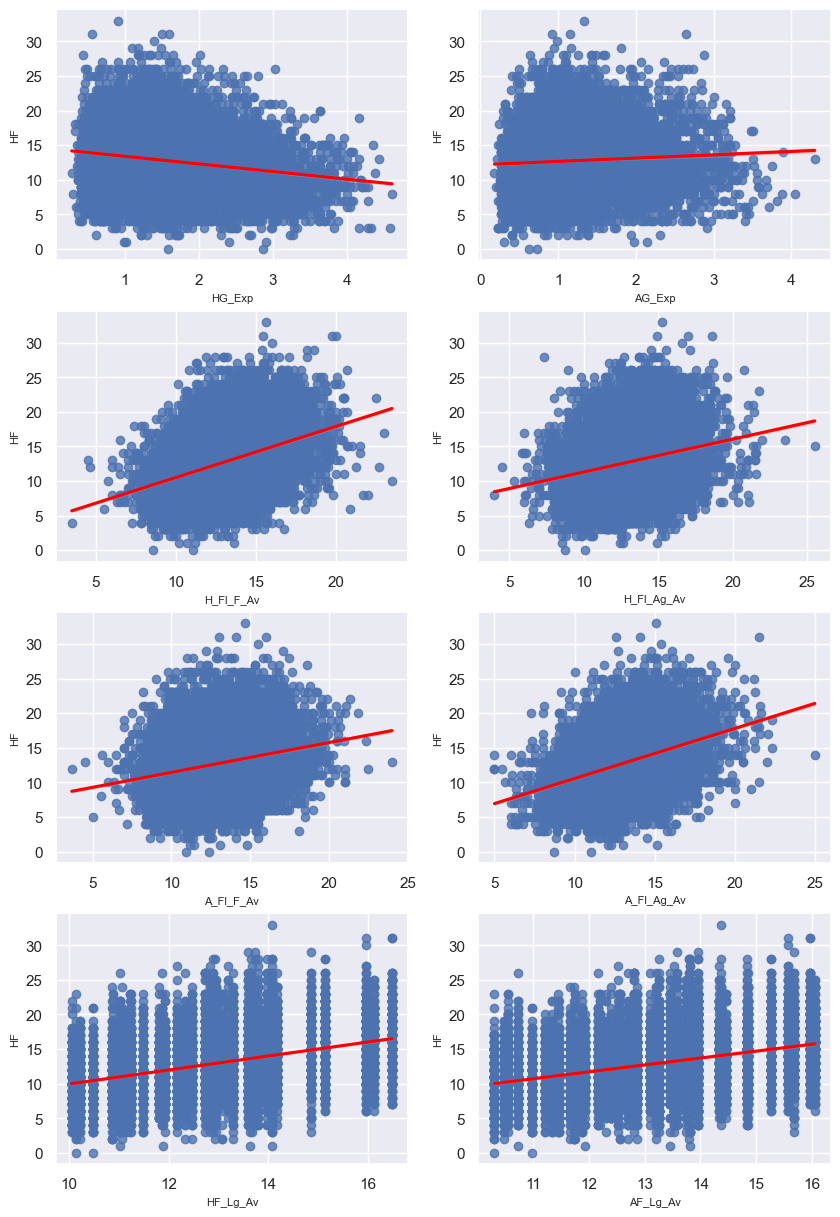

In [42]:
sns.set(rc = {'figure.figsize':(10,15), # width,length
              'axes.labelsize':8})
fig,axes = plt.subplots(4,2)

sns.regplot(data=df_comb, x='HG_Exp', y='HF', ax=axes[0,0], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='AG_Exp', y='HF', ax=axes[0,1], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='H_Fl_F_Av', y='HF', ax=axes[1,0], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='H_Fl_Ag_Av', y='HF', ax=axes[1,1], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='A_Fl_F_Av', y='HF', ax=axes[2,0], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='A_Fl_Ag_Av', y='HF', ax=axes[2,1], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='HF_Lg_Av', y='HF', ax=axes[3,0], line_kws={'color':'red'})
sns.regplot(data=df_comb, x='AF_Lg_Av', y='HF', ax=axes[3,1], line_kws={'color':'red'})

# _________________________________________________________________________________

### Residual Plots - are relationships linear?

<AxesSubplot:xlabel='AF_Lg_Av', ylabel='HF'>

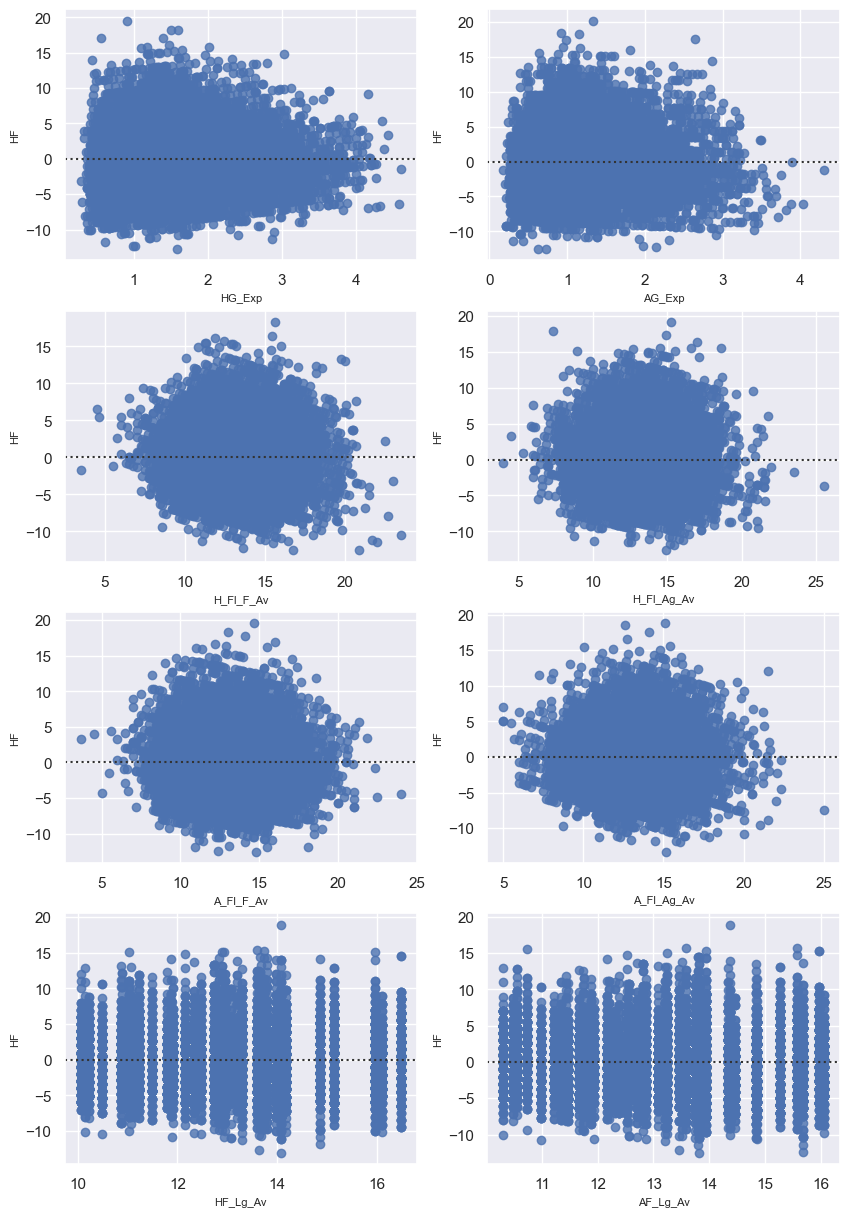

In [43]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
#sns.residplot(x=df['HG_Exp'],y=df['HST'])
#plt.show()

sns.set(rc = {'figure.figsize':(10,15),
              'axes.labelsize':8})
fig,axes = plt.subplots(4,2)

sns.residplot(data=df_comb, x='HG_Exp', y='HF', ax=axes[0,0], line_kws={'color':'red'})
sns.residplot(data=df_comb, x='AG_Exp', y='HF', ax=axes[0,1], line_kws={'color':'red'})
sns.residplot(data=df_comb, x='H_Fl_F_Av', y='HF', ax=axes[1,0], line_kws={'color':'red'})
sns.residplot(data=df_comb, x='H_Fl_Ag_Av', y='HF', ax=axes[1,1], line_kws={'color':'red'})
sns.residplot(data=df_comb, x='A_Fl_F_Av', y='HF', ax=axes[2,0], line_kws={'color':'red'})
sns.residplot(data=df_comb, x='A_Fl_Ag_Av', y='HF', ax=axes[2,1], line_kws={'color':'red'})
sns.residplot(data=df_comb, x='HF_Lg_Av', y='HF', ax=axes[3,0], line_kws={'color':'red'})
sns.residplot(data=df_comb, x='AF_Lg_Av', y='HF', ax=axes[3,1], line_kws={'color':'red'})

All look evenly distributed around the mean except goals which suggest rate of fouls decreases as goals increase. Non-linear relationship.

### Model the data - Split data into Train and Test groups and apply linear regression testing different combinations of features
#### Compares R^2 and rmse values as metric to determine best features

In [44]:
#Split data separating the independent and target variables with chosen best correlated features
y_data = df_comb['HF']
X_data = df_comb[['HG_Exp', 'AG_Exp','H_Fl_F_Av', 'A_Fl_Ag_Av', 'HF_Lg_Av', 'AF_Lg_Av', 'A_Fl_F_Av', 'H_Fl_Ag_Av']]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=8)
print('number of test samples :', x_test.shape[0])
print('number of training samples :', x_train.shape[0])

number of test samples : 2845
number of training samples : 11379


In [322]:
# Currently best model purely on R2 

lr = LinearRegression()
lr.fit(x_train[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av', 'A_Fl_Ag_Av', 'HF_Lg_Av', 'AF_Lg_Av', 'A_Fl_F_Av', 'H_Fl_Ag_Av']],y_train)
r2 = lr.score(x_test[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av', 'A_Fl_Ag_Av', 'HF_Lg_Av', 'AF_Lg_Av', 'A_Fl_F_Av', 'H_Fl_Ag_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', r2)
print('rmse is: ',rmse)
print(lr.intercept_)
print(lr.coef_)


The R-Square is:  0.22692354228760936
rmse is:  3.6019309408365143
1.9011559559019862
[-1.04289049 -0.47858736  0.4037766   0.47269146  0.50498368 -0.32826667
 -0.05249259  0.01389718]


In [323]:
# remove lg_Av as a feature - correlated with Home/Away feature
# ********* For simplicity (fewer features), multi-collinearity issues & negligible reduction in R2 keep this as current Model *********

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr1 = LinearRegression()
lr1.fit(x_train[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av','A_Fl_Ag_Av', 'A_Fl_F_Av', 'H_Fl_Ag_Av']],y_train)
x = lr1.score(x_test[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av', 'A_Fl_Ag_Av', 'A_Fl_F_Av', 'H_Fl_Ag_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr1.intercept_)
print(lr1.coef_)


The R-Square is:  0.22276737396699475
rmse is:  3.6019309408365143
1.8744130142168824
[-0.99950673 -0.4173906   0.4406436   0.51121214 -0.01152835  0.05496165]


In [324]:
# Just Sup, Home_F and Away_A features

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr1 = LinearRegression()
lr1.fit(x_train[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av', 'A_Fl_Ag_Av']],y_train)
x = lr1.score(x_test[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av', 'A_Fl_Ag_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr1.intercept_)
print(lr1.coef_)

The R-Square is:  0.22387856002721462
rmse is:  3.6019309408365143
2.050680854886373
[-0.98769724 -0.40043349  0.4550087   0.5237242 ]


In [325]:
# just Supremacy (for comparison with polynomial)

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr1 = LinearRegression()
lr1.fit(x_train[['HG_Exp', 'AG_Exp']],y_train)
x = lr1.score(x_test[['HG_Exp', 'AG_Exp']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr1.intercept_)
print(lr1.coef_)


The R-Square is:  0.045672567609097214
rmse is:  3.6019309408365143
17.460487652148647
[-1.98479095 -1.32127206]


In [326]:
# just HG (for comparison with polynomial)

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr1 = LinearRegression()
lr1.fit(x_train[['HG_Exp']],y_train)
x = lr1.score(x_test[['HG_Exp']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr1.intercept_)
print(lr1.coef_)


The R-Square is:  0.028495848077884856
rmse is:  3.6019309408365143
14.506010652682454
[-1.1119392]


In [327]:
# just Supremacy and league averages

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr1 = LinearRegression()
lr1.fit(x_train[['HG_Exp', 'AG_Exp', 'HF_Lg_Av', 'AF_Lg_Av']],y_train)
x = lr1.score(x_test[['HG_Exp', 'AG_Exp','HF_Lg_Av', 'AF_Lg_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr1.intercept_)
print(lr1.coef_)


The R-Square is:  0.17654159046676388
rmse is:  3.6019309408365143
3.6186058292424104
[-1.50773332 -0.72773202  0.96765674  0.00291678]


In [328]:
# just Supremacy and HF_for_Av and 

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr1 = LinearRegression()
lr1.fit(x_train[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av']],y_train)
x = lr1.score(x_test[['HG_Exp', 'AG_Exp','H_Fl_F_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr1.intercept_)
print(lr1.coef_)

The R-Square is:  0.17341541249092118
rmse is:  3.6019309408365143
5.937198593851429
[-0.88667486 -0.53675486  0.68076013]


In [329]:
# just HF_for_Av (for comparison with polynomial transform)

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=8)
lr1 = LinearRegression()
lr1.fit(x_train[['H_Fl_F_Av']],y_train)
x = lr1.score(x_test[['H_Fl_F_Av']],y_test)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('The R-Square is: ', x)
print('rmse is: ',rmse)
print(lr1.intercept_)
print(lr1.coef_)

The R-Square is:  0.16480801126118894
rmse is:  3.6019309408365143
3.203870400871285
[0.73388679]


### Check for linearity of the data - polynomial better??

In [330]:
# relationship may be non-linear - ploynomial transform of HG_Exp and then H_SoT_F_Av (vs HST)

#from sklearn.preprocessing import PolynomialFeatures

n=2 # degree variable

def PlotPolly(model, ind_var, dep_var, Name):
    #x_new = np.linspace(0,3.5)
    x_new = np.linspace(0.5,3.5)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('HF')
    
    plt.show()
    plt.close()
    
X = df_comb['HG_Exp']
y = df_comb['HF']  

f = np.polyfit(X,y,n) 
p = np.poly1d(f)
print(p)

         2
-0.5498 x + 0.9986 x + 12.77


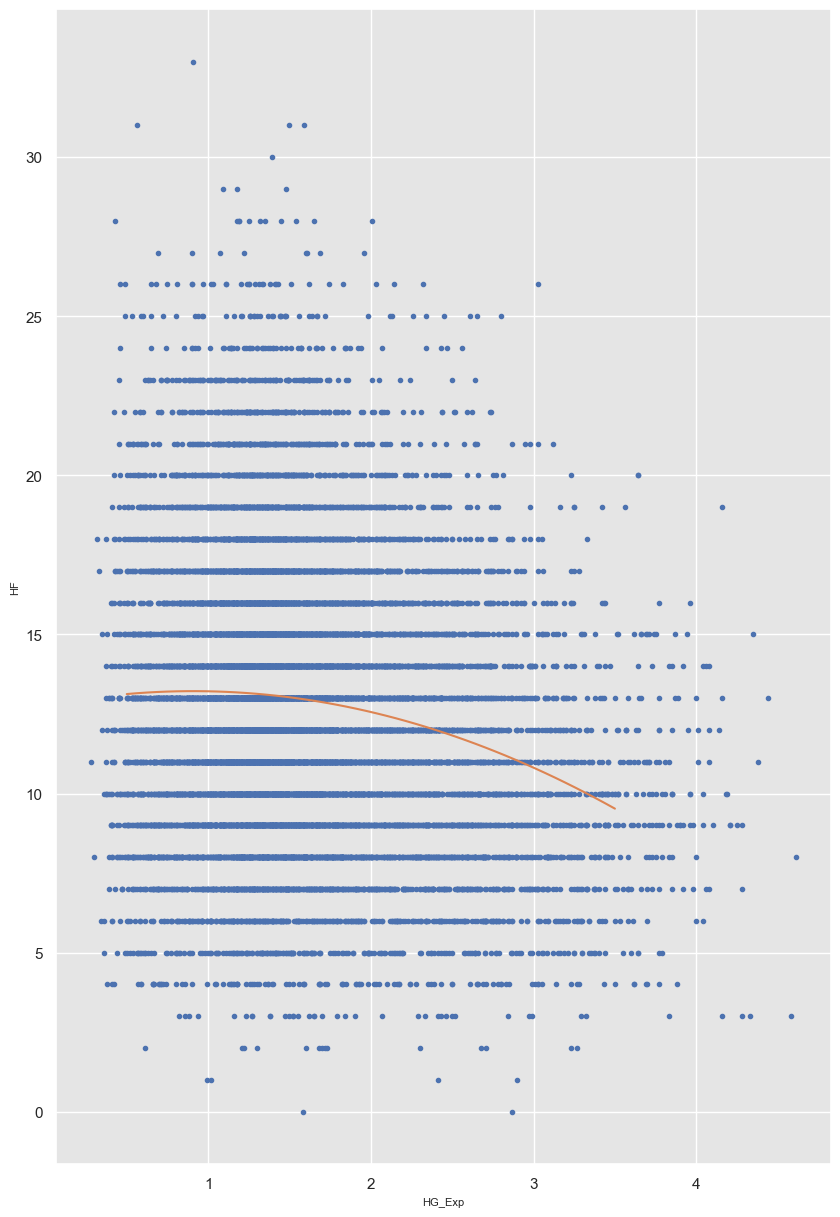

In [331]:
PlotPolly(p,X,y,'HG_Exp')

In [332]:

r_squared = r2_score(y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.03490960337891258


** R2 suggests improvement in relationship with polynomial curve **

Now do same for Home Fouls Average

In [333]:
n=2 # degree variable

def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(5,20)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('HF')
    
    plt.show()
    plt.close()
    
X = df_comb['H_Fl_F_Av']
y = df_comb['HF']  

f = np.polyfit(X,y,n) 
p = np.poly1d(f)
print(p)

           2
-0.004928 x + 0.8705 x + 2.265


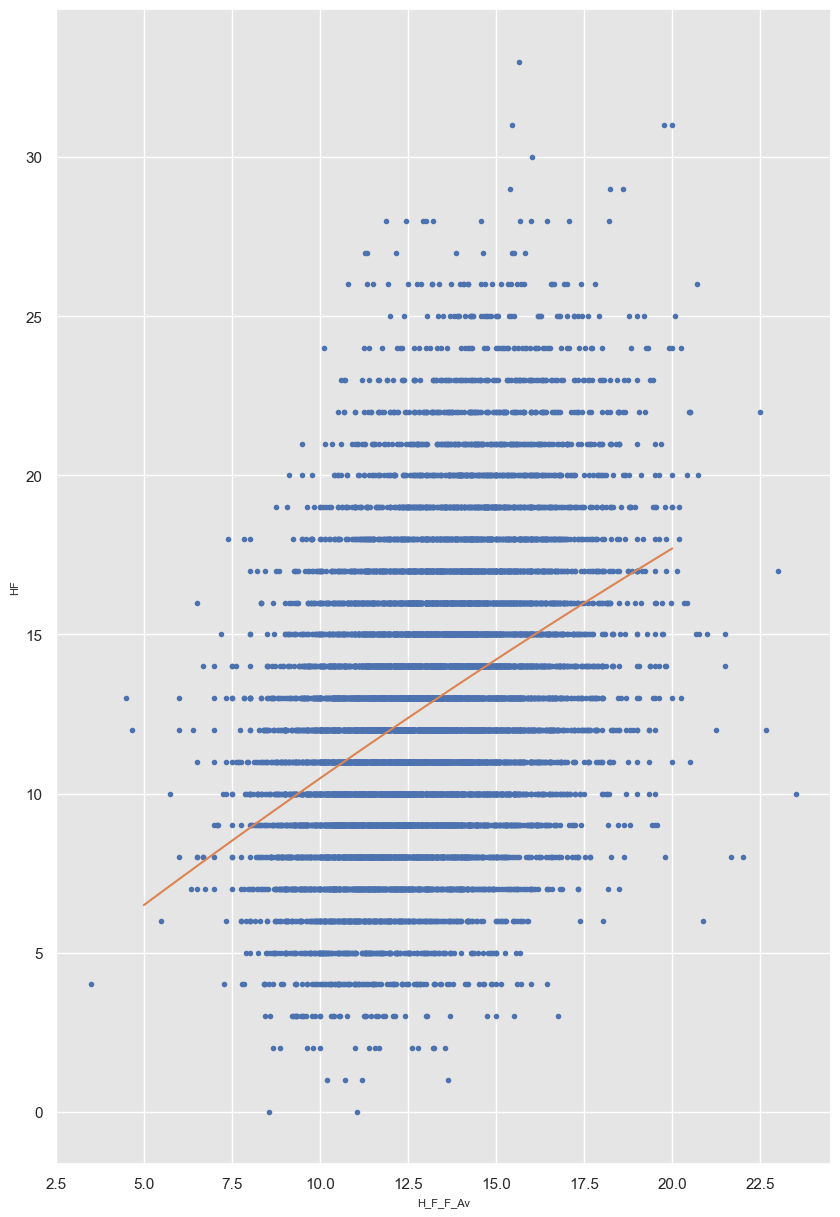

In [334]:
PlotPolly(p,X,y,'H_F_F_Av')

In [335]:
r_squared = r2_score(y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.14969802887643846


*** R2 scores do not indicate any improved relationship with polynomial fit over linear for Home averages***

### Multivariate Polynomial

In [367]:
X, y = df_comb[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av','A_Fl_Ag_Av','H_Fl_Ag_Av','A_Fl_F_Av']], df_comb["HF"]
poly = PolynomialFeatures(degree=2)#, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [370]:
#poly_reg_model.coef_
r_sq = poly_reg_model.score(X_test, y_test)
print(f"R-squared value: {r_sq}")

R-squared value: 0.2120900305021859


In [ ]:
from sklearn.metrics import mean_squared_error
poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print(f"RMSE value: {poly_reg_rmse}")

RMSE value: 3.6957227546468956


In [ ]:
# Transform the test data using the same polynomial features transformation

r_squared = poly_reg_model.score(X_test_poly, y_test)
print(f"R-squared value: {r_squared}")

R-squared value: 0.212090030502186


In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

3.7006580098292776

In [357]:
print(lin_reg_model.coef_)
print(lin_reg_model.intercept_)

[-0.97837249 -0.47771728  0.44523102  0.52470926  0.03199763 -0.00218794]
1.8294766512135414


*** Multivariate polynomial doesn't show R2 improvement over multiple linear model

#### Findings:
- Linear model has a marginally higher R2 than the poly multivariate
- Linear model has a marginally lower RMSE (lower is better). 
##### Based on the above we keep the linear model but be aware of fitting of extreme supremacies, poly may handle those better
    

# ______________________________________________________________________________

### Repeat linear fit for AST using all features of linear model which gave the best R2

In [374]:
#Split our data separating the independent and target variables
y_data_a = df_comb['AF']
X_data_a = df_comb[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av','A_Fl_Ag_Av','H_Fl_Ag_Av','A_Fl_F_Av']]

In [375]:

x_train, x_test, y_train, y_test = train_test_split(X_data_a, y_data_a, test_size=0.20, random_state=8)
lr = LinearRegression()
lr.fit(x_train[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av','A_Fl_Ag_Av','H_Fl_Ag_Av','A_Fl_F_Av']],y_train)
x = lr.score(x_test[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av','A_Fl_Ag_Av','H_Fl_Ag_Av','A_Fl_F_Av']],y_test)

print('The R-Square is: ', x)
print(lr.intercept_)
print(lr.coef_)

The R-Square is:  0.2132272465670373
4.495980625845037
[-1.22429508 -1.36622721 -0.03196227 -0.02192317  0.50644396  0.47740315]


# _________________________________________________________________________________

### Final fit of models to be used - using all data combined 

In [377]:
# HST BEST MODEL USING ALL DATA (no test/train split)

y = df_comb['HF']
X = df_comb[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av','A_Fl_Ag_Av','H_Fl_Ag_Av','A_Fl_F_Av']]

lr = LinearRegression()
lr.fit(X,y)
r = lr.score(X,y)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('**The R-Square is**: ', round(r,3))
print('rmse is: ', round(rmse,3))
print('Intercept is: ',round(lr.intercept_,3))
print('Coeff HG_Exp: ',round(lr.coef_[0],3))
print('Coeff AG_Exp: ',round(lr.coef_[1],3))
print('Coeff H_Fl_F_Av: ',round(lr.coef_[2],3))
print('Coeff A_Fl_Ag_Av: ',round(lr.coef_[3],3))
print('Coeff H_Fl_Ag_Av: ',round(lr.coef_[4],3))
print('Coeff A_Fl_F_Av: ',round(lr.coef_[5],3))


**The R-Square is**:  0.215
rmse is:  4.159
Intercept is:  1.922
Coeff HG_Exp:  -1.005
Coeff AG_Exp:  -0.44
Coeff H_Fl_F_Av:  0.446
Coeff A_Fl_Ag_Av:  0.503
Coeff H_Fl_Ag_Av:  0.039
Coeff A_Fl_F_Av:  0.004


In [378]:
# AST BEST MODEL USING ALL DATA (no test/train split)

y = df_comb['AF']
X = df_comb[['HG_Exp', 'AG_Exp', 'H_Fl_F_Av','A_Fl_Ag_Av','H_Fl_Ag_Av','A_Fl_F_Av']]

lr = LinearRegression()
lr.fit(X,y)
r = lr.score(X,y)

lr_y_predict = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_y_predict))

print('**The R-Square is**: ', round(r,3))
print('rmse is: ', round(rmse,3))
print('Intercept is: ',round(lr.intercept_,3))
print('Coeff HG_Exp: ',round(lr.coef_[0],3))
print('Coeff AG_Exp: ',round(lr.coef_[1],3))
print('Coeff H_Fl_F_Av: ',round(lr.coef_[2],3))
print('Coeff A_Fl_Ag_Av: ',round(lr.coef_[3],3))
print('Coeff H_Fl_Ag_Av: ',round(lr.coef_[4],3))
print('Coeff A_Fl_F_Av: ',round(lr.coef_[5],3))

**The R-Square is**:  0.204
rmse is:  3.79
Intercept is:  4.342
Coeff HG_Exp:  -1.223
Coeff AG_Exp:  -1.376
Coeff H_Fl_F_Av:  -0.037
Coeff A_Fl_Ag_Av:  -0.014
Coeff H_Fl_Ag_Av:  0.505
Coeff A_Fl_F_Av:  0.487
